## 1. Descrizione del problema

Si vuole creare una **rete sociale** che metta in relazione diversi autori di pubblicazioni scientifiche (docenti, assegnisti, dottorandi e professori emeriti afferenti al Dipartimento di Statistica). La forza della loro relazione (peso di ciascun arco) sarà determinata in base al numero di pubblicazioni fatte assieme.

La lista degli autori si otterrà mediante *web scraping* di alcune tabelle contenute nelle pagine web del [sito del Dipartimento di Scienze Statistiche](https://www.stat.unipd.it/). I dati ottenuti possono essere "sporchi" ed avere bisogno di essere filtrati e/o trattati.

Una volta realizzato il grafo, vogliamo ottenere alcuni indici per descrivere i nodi e il grafo stesso.

## 2. Web scraping dei dati

In [1]:
import urllib.request
from bs4 import BeautifulSoup
import re
import itertools
import pandas as pd

La funzione `pulisci_stringa` serve a rimuovere tutti i caratteri "non alfanumerici" da ciascuna stringa di testo.

In [2]:
def pulisci_stringa(x):
    if x is None or x.strip()=="":
        return None
    x = re.sub('[^0-9a-zA-Z_ ]+', ' ', x.title().strip())
    return(x)

### 2.1 Lista dei docenti

In [116]:
url = "https://www.stat.unipd.it/dipartimento/docenti"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

elem_docenti = soup.findAll(attrs={"target" : "_blank"})

lista_docenti = []
for elem in elem_docenti:
    lista_docenti.append(elem.string)

lista_docenti = [pulisci_stringa(nome) for nome in lista_docenti if nome is not None and nome != 'home' ]

In [117]:
lista_docenti

['Adimari Gianfranco',
 'Barbiera Irene',
 'Bassi Francesca',
 'Bernardi Mauro',
 'Bille  Anna Gloria',
 'Bisaglia Luisa',
 'Boccuzzo Giovanna',
 'Bolzan Mario',
 'Brazzale Alessandra Rosalba',
 'Canale Antonio',
 'Capizzi Giovanna',
 'Caporin Massimiliano',
 'Castiglioni Maria',
 'Cattelan Manuela',
 'Celant Giorgio',
 'Cesaroni Annalisa',
 'Clerici Renata',
 'Cortese Giuliana',
 'Dalla Valle Alessandra',
 'Dalla Zuanna Gianpiero',
 'Di Fonzo Tommaso',
 'Furlan Claudia',
 'Giraldo Anna',
 'Grigoletto Matteo',
 'Guidolin Mariangela',
 'Guolo Annamaria',
 'Kenne Pagui Euloge Clovis',
 'Lisi Francesco',
 'Masarotto Guido',
 'Mazzuco Stefano',
 'Meggiolaro Silvia',
 'Menardi Giovanna',
 'Mortarino Cinzia',
 'Ongaro Fausta',
 'Paccagnella Omar',
 'Paggiaro Adriano',
 'Risso  Davide',
 'Roverato  Alberto',
 'Ruli Erlis',
 'Salvan Alessandra',
 'Sartori Nicola',
 'Scarpa Bruno',
 'Scioni Manuela',
 'Tanturri Maria Letizia',
 'Tonolo Alberto',
 'Ventura Laura']

### 2.2 Lista degli assegnisti di ricerca

Suggerimento: iterare le righe della prima tabella della pagina `soup.findAll('table')[0].tbody.findAll('tr')`.

Per identificare il campo da cui leggere nome e cognome del ricercatore, aiutarsi stampando il contenuto di una riga della tabella, ad esempio: 

`print(soup.findAll('table')[0].tbody.findAll('tr')[0])`.

In [234]:
url = "https://www.stat.unipd.it/fare-ricerca/assegnisti"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

elem_assegnisti = soup.findAll('table')[0].tbody.findAll('tr')

lista_assegnisti = []
for elem in elem_assegnisti:
        lista_assegnisti.append(elem.span.string)

lista_assegnisti = [pulisci_stringa(nome) for nome in lista_assegnisti if nome is not None]

In [235]:
print(lista_assegnisti)

['Righelli Dario', 'Aliverti Emanuele', 'Ferraccioli Federico', 'Nguyen Thi Kim Hue', 'Parise Nicoletta', 'Stefanucci Marco', 'To Duc Khanh', 'Silan Margherita', 'Sottosanti Andrea', 'Poli Francesco']


### 2.3 Lista dei dottorandi

In [94]:
url = "https://www.stat.unipd.it/fare-ricerca/people-cicli-attivi"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

elem_dottorandi = soup.findAll('table')[0].tbody.findAll('tr')

lista_dottorandi = []
for elem in elem_dottorandi:
        print(elem.a.string)

lista_dottorandi = [pulisci_stringa(nome) for nome in lista_dottrandi if nome is not None]

Ahmad Tougeer
Alfonzetti Giuseppe
Banzato Erika
Belloni Pietro
Nicolas Bianco
Castiglione Cristian
Girardi Marco
Huang Caizhu
Setoudeh Fariborz
D'Angelo Laura
De Nicolò Silvia
Degani Emanuele
None
None
None
None
None
None
None
Angela Andreella
Gagliardi Alessandro
Lambardi di San Miniato Michele
Liu Shaowen
Malenje Bonface
Musau Victor
Pesantez Cabrera Tania Erika


AttributeError: 'NoneType' object has no attribute 'string'

### (facoltativo) 2.4 Lista dei professori emeriti

Suggerimento: iterare le celle della tabella `soup.findAll('td', class_="tab_dctv")`.
Escludere dalla lista i nomi non validi: stringhe vuote ed indirizzi mail.

In [ ]:
url = "https://www.stat.unipd.it/dipartimento/professori-emeriti"
# ...

lista_emeriti = []
for row in soup.findAll('td', class_="tab_dctv"):
    # ...
    #lista_emeriti += [...]

lista_emeriti = [pulisci_stringa(nome) for nome in lista_emeriti if nome is not None]

### (facoltativo) 2.5 Lista degli studiosi senior

In [ ]:
url = "https://www.stat.unipd.it/dipartimento/studiosi-senior"
# ...

### 2.6 Assemblare tutte le liste

Tutti gli autori ottenuti nelle operazioni precedenti vanno inseriti in un'unica lista, rimuovendo i valori nulli.

In [239]:
lista_autori = lista_docenti

### 2.7 Ottenere la lista delle pubblicazioni

Per scaricare la lista delle pubblicazioni, interroghiamo il motore di ricerca [Padua Research Archive](https://www.research.unipd.it/simple-search) su piattaforma IRIS (Institutional Research Information System).

Facendo una ricerca (ad esempio per autore: "Mario Rossi"), il sistema genera una URL che è possibile parametrizzare per altre ricerche simili: `https://www.research.unipd.it/simple-search?query=mario+rossi&rpp=10&sort_by=score&order=desc`.

Utilizzeremo questa proprietà per scaricare le pubblicazioni degli autori raccolti fino a questo punto, sostituendo nell'URL la stringa `"mario+rossi"`.

In [170]:
from tqdm import tqdm

# scraping della ricerca su https://www.research.unipd.it
url_template = "https://www.research.unipd.it/simple-search?query=%22{}%22&rpp=100&sort_by=bi_sort_2_sort&order=desc"
    
# ... una volta ottenuta la lista degli autori, che possono essere più di 2, posso usare questa funzione
# per avere la combinazione a gruppi di 2
combinazioni_autori = [pair for pair in itertools.combinations(lista_autori, 2)]
lista_pubblicazioni = []
lista_pubblicazioni2 = []
for comb in tqdm(combinazioni_autori):
    lista_pubblicazioni2 = []
    url = url_template.format((comb[0] + " " + comb[1]).replace(" ","+"))
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page, "lxml")
    elementi = soup.findAll('tr')
    for elem in elementi:
        lista_pubblicazioni2.append(elem.a.string)
        lista_pubblicazioni2 = [pulisci_stringa(nome) for nome in lista_pubblicazioni2 if nome is not None]  
    lista_pubblicazioni.append(lista_pubblicazioni2)
 

100%|██████████████████████████████████████████████████████████████████████████████| 1035/1035 [06:44<00:00,  2.56it/s]


In [132]:
lista_pubblicazioni = []
url = url_template.format((combinazioni_autori[44][0] + " " + combinazioni_autori[44][1]).replace(" ","+"))
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
elementi = soup.findAll('tr')
for elem in elementi:
    lista_pubblicazioni.append(elem.a.string)
lista_pubblicazioni = [pulisci_stringa(nome) for nome in lista_pubblicazioni if nome is not None]

In [173]:
print(lista_pubblicazioni)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['A Note On The Asymptotic Behaviour Of Empirical Likelihood Statistics', 'Una Nota Sul Comportamento Asintotico Della Statistica Di Verosimiglianza Empirica '], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['Quasi Likelihood From M Estimators  A Numerical Comparison With Empirical Likelihood', 'Quasi Profile Log Likelihoods For Unbiased Estimating Functions', 'Quasi Likelihood From M Estimators  A Numerical Comparison With Empirical Likelihood', 'Robust Inference For Generalized Linear Models With Application To Logistic Regression', 'On The Robust Inference For Generalized Linear Models'], [], [], [], [], [], [], [], [], [], [], ['A Synthetic Measure Of Mortality Using Skeletal Data From Ancient Cemeteries  The D Index', 'Missing Women In The Italian Middle Ages  Data And Interpretation', 'Missing Women In The Italian Middle Ages  Data And Interpretation', '

## 3. Costruzione del dataset

### 3.1 Valorizzazione degli archi

Scorriamo tutte le coppie di autori delle pubblicazioni scaricate e conteggiamo la frequenza con la quale ciascuna coppia si presenta. Selezioniamo solo le coppie di autori che hanno fatto almeno 2 pubblicazioni assieme, per ridurre il possibile numero di archi.

In [174]:
lista_pubblicazioni2 = lista_pubblicazioni.copy()

In [181]:
numero_pubblicazioni = []
for pub in lista_pubblicazioni:
    numero_pubblicazioni.append(len(pub))

In [211]:
combinazione_autori_def = []
for i in range(0,len(combinazione_autori)):
    if numero_pubblicazioni[i]>=2:
        combinazione_autori_def.append(combinazioni_autori[i])                            

In [196]:
numero_pubblicazioni_def = []
for i in range(0,len(numero_pubblicazioni)):
    if numero_pubblicazioni[i]>=2:
        numero_pubblicazioni_def.append(numero_pubblicazioni[i])

In [221]:
for i in range(0,len(combinazione_autori_def)):
    combinazione_autori_def[i] += (numero_pubblicazioni_def[i],)

In [243]:
comb_autori = []
for i in range(0,len(lista_autori)):
    c=0
    for j in range(0,len(combinazione_autori_def)):
        if (combinazione_autori_def[j][0]==lista_autori[i] or combinazione_autori_def[j][1]==lista_autori[i]):
            c += combinazione_autori_def[j][2]
    if c>10:
        comb_autori.append(combinazione_autori_def[i])

IndexError: list index out of range

In [222]:
print(combinazione_autori_def)

[('Adimari Gianfranco', 'Guolo Annamaria', 2), ('Adimari Gianfranco', 'Ventura Laura', 5), ('Barbiera Irene', 'Castiglioni Maria', 5), ('Barbiera Irene', 'Dalla Zuanna Gianpiero', 2), ('Bassi Francesca', 'Clerici Renata', 4), ('Bassi Francesca', 'Scarpa Bruno', 2), ('Bisaglia Luisa', 'Grigoletto Matteo', 3), ('Boccuzzo Giovanna', 'Paggiaro Adriano', 2), ('Brazzale Alessandra Rosalba', 'Ventura Laura', 4), ('Canale Antonio', 'Scarpa Bruno', 3), ('Capizzi Giovanna', 'Masarotto Guido', 28), ('Caporin Massimiliano', 'Lisi Francesco', 7), ('Castiglioni Maria', 'Clerici Renata', 2), ('Castiglioni Maria', 'Dalla Zuanna Gianpiero', 26), ('Cattelan Manuela', 'Sartori Nicola', 2), ('Clerici Renata', 'Giraldo Anna', 11), ('Clerici Renata', 'Meggiolaro Silvia', 3), ('Clerici Renata', 'Paccagnella Omar', 3), ('Cortese Giuliana', 'Sartori Nicola', 3), ('Cortese Giuliana', 'Ventura Laura', 3), ('Dalla Valle Alessandra', 'Furlan Claudia', 10), ('Dalla Valle Alessandra', 'Guidolin Mariangela', 2), ('Da

### 3.2 Valorizzazione dei nodi

Filtriamo gli autori con almeno 10 pubblicazioni ciascuno.

## 4. Costruzione del grafo

### 4.1 Inizializzazione del grafo

Costruiamo infine il grafo istanziando la classe `networkx.Graph()` e applicando il metodo `add_weighted_edges_from()` usando come parametro la nostra lista degli archi "pesata".

Calcoliamo la posizione dei nodi con la funzione `networkx.spring_layout()`.

In [191]:
import networkx as nx
import matplotlib.pyplot as plt

In [225]:
G = nx.Graph()
N = G.nodes()
A = G.edges()

In [227]:
G.add_weighted_edges_from(combinazione_autori_def)

### 4.2 Rappresentazione del grafo

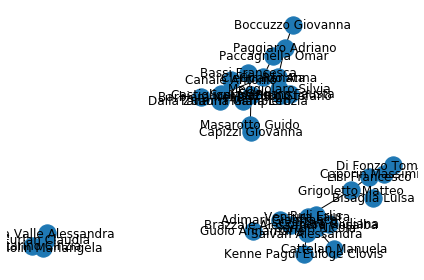

In [238]:
pos = nx.spring_layout(G, seed=1)

nx.draw_networkx(G = G, pos = pos, with_labels=True)
plt.axis('off')
plt.tight_layout()
plt.show()

### 4.3 Community detection

Utilizzare il metodo di Louvain per identificare le diverse comunità e calcolare la modularità di questo partizionamento.

In [244]:
import community
import pandas as pd

### 4.4 Calcolo della betweenness dei nodi

Calcolare la betweenness dei nodi del grafo.

### 4.5 Rappresentazione del grafo (parametrizzando dimensione e colori dei nodi)

Rappresentare nuovamente il grafo parametrizzando:
* il colore dei nodi: determinato dalla comunità
* la dimensione dei nodi: determinata dalla betweenness